In [24]:
import numpy as np
import pandas as pd


data = pd.read_csv('Data\Crop_Data.csv')
data

<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\FRANKFELIXAI\AppData\Local\Temp\ipykernel_14460\226824592.py:5: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv('Data\Crop_Data.csv')


,temperature,humidity,ph,water availability,season,label,Country,harvest season
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria,spring
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria,winter
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria,rainy
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria,rainy
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria,spring
...,...,...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute,South Africa,winter
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute,South Africa,winter
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute,Nigeria,summer
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute,Nigeria,summer


In [25]:
import pandas as pd


# Define a function to calculate IQR and mean for each column
def calculate_stats(series):
    q1 = series.quantile(0.15)
    q3 = series.quantile(0.85)
    return {
        'min': q1,
        'max': q3,
        'opt': series.mean()
    }

# Group by 'label' (crop) and apply the function to each column
crop_stats = data.groupby('label').agg({
    'temperature': calculate_stats,
    'humidity': calculate_stats,
    'water availability': calculate_stats,
    'ph': calculate_stats,
    
})

# Create a new DataFrame from the results
new_df = crop_stats.reset_index()

# Display the new DataFrame
new_df


,label,temperature,humidity,water availability,ph
0,blackgram,"{'min': 27.152432047999998, 'max': 33.09532432...","{'min': 61.607230490999996, 'max': 68.35449825...","{'min': 62.993649003, 'max': 72.6160534295, 'o...","{'min': 6.6568300816, 'max': 7.53940737615, 'o..."
1,chickpea,"{'min': 17.477631682, 'max': 20.27124315050000...","{'min': 14.8193207355, 'max': 18.9230566860000...","{'min': 70.81886495, 'max': 89.6111375725, 'op...","{'min': 6.407769550499999, 'max': 8.1712847137..."
2,cotton,"{'min': 22.709439126, 'max': 25.3265672615, 'o...","{'min': 76.245014327, 'max': 83.6330800825, 'o...","{'min': 66.4507179315, 'max': 91.9694626535, '...","{'min': 6.1858448929000005, 'max': 7.637939133..."
3,jute,"{'min': 23.5424241035, 'max': 26.3935686925, '...","{'min': 73.467221263, 'max': 86.8493020675, 'o...","{'min': 154.836804955, 'max': 192.27084764, 'o...","{'min': 6.1853212619999995, 'max': 7.265441530..."
4,kidneybeans,"{'min': 17.12554529, 'max': 23.217351125999997...","{'min': 18.927807457, 'max': 24.33394803849999...","{'min': 72.805035837, 'max': 137.351065635, 'o...","{'min': 5.58200486985, 'max': 5.935097944, 'op..."
5,lentil,"{'min': 20.7112031235, 'max': 28.079029967, 'o...","{'min': 61.57261354, 'max': 68.5381460915, 'op...","{'min': 38.193138948999994, 'max': 51.99230858...","{'min': 6.2779073979, 'max': 7.60671783535, 'o..."
6,maize,"{'min': 18.870903989, 'max': 25.3459979215, 'o...","{'min': 59.245742102499996, 'max': 71.65201071...","{'min': 65.83237718150001, 'max': 104.17304672...","{'min': 5.7502038647, 'max': 6.67668998275, 'o..."
7,mothbeans,"{'min': 25.4956392275, 'max': 30.904391545, 'o...","{'min': 44.7515350515, 'max': 61.2678578939999...","{'min': 35.024337555, 'max': 68.1166552245, 'o...","{'min': 4.5240911647, 'max': 8.86957240095, 'o..."
8,mungbean,"{'min': 27.5979922385, 'max': 29.598025546, 'o...","{'min': 81.97399679499999, 'max': 88.674317031...","{'min': 40.1587070585, 'max': 56.549994111, 'o...","{'min': 6.40088285645, 'max': 7.07024288150000..."
9,muskmelon,"{'min': 27.6889868175, 'max': 29.6370759474999...","{'min': 90.716985866, 'max': 94.2711847315, 'o...","{'min': 21.249819170000002, 'max': 28.09423807...","{'min': 6.1049725349, 'max': 6.662069008500000..."


In [26]:
data.isnull().sum()

temperature           0
humidity              0
ph                    0
water availability    0
season                0
label                 0
Country               0
harvest season        0
dtype: int64

In [27]:
data.describe()

,temperature,humidity,ph,water availability
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,24.971621,64.611062,6.565246,91.784651
std,4.081622,22.753785,0.835101,58.682258
min,15.330426,14.258040,3.504752,20.211267
25%,22.178239,56.824217,6.068795,51.546542
50%,25.140245,68.288321,6.524478,72.379183
75%,27.963227,82.710409,7.042343,107.428334
max,36.977944,94.962187,9.935091,298.560117


In [28]:
data[['temperature','humidity', 'ph','water availability']] .corr()

,temperature,humidity,ph,water availability
temperature,1.000000,0.439515,0.065129,-0.193765
humidity,0.439515,1.000000,0.044471,-0.029793
ph,0.065129,0.044471,1.000000,-0.134246
water availability,-0.193765,-0.029793,-0.134246,1.000000


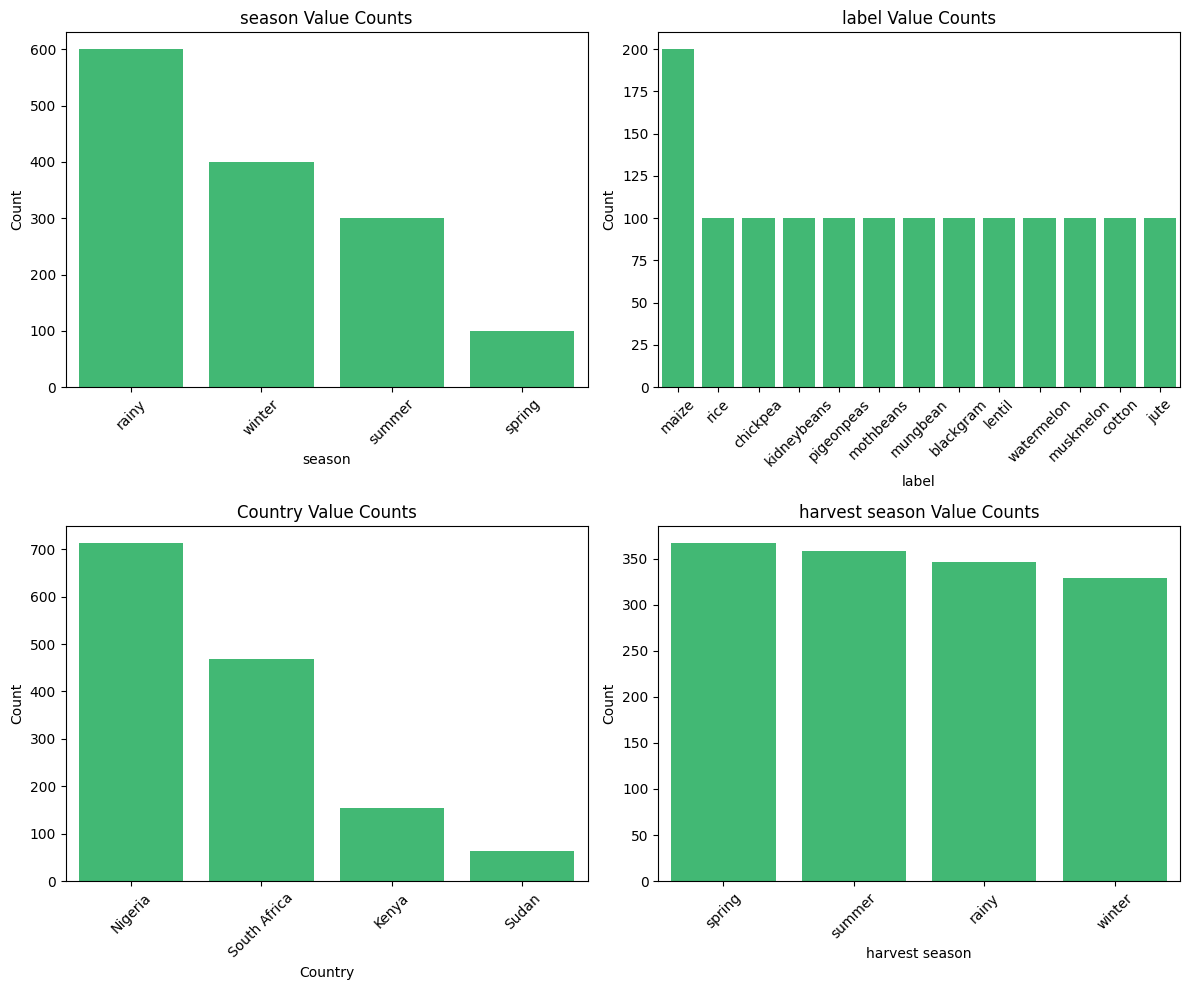

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color codes
emerald = '#2ecc71'  # Emerald color

# Assuming 'data' is your DataFrame

# List of categorical features
categorical_features = ['season', 'label', 'Country', 'harvest season']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot bar charts for each categorical feature with specific color
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index, ax=axes[i], color=emerald)
    axes[i].set_title(f'{feature} Value Counts')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Save the image
plt.savefig('categorical_value_counts_emerald.png')

# Show the plot
plt.show()


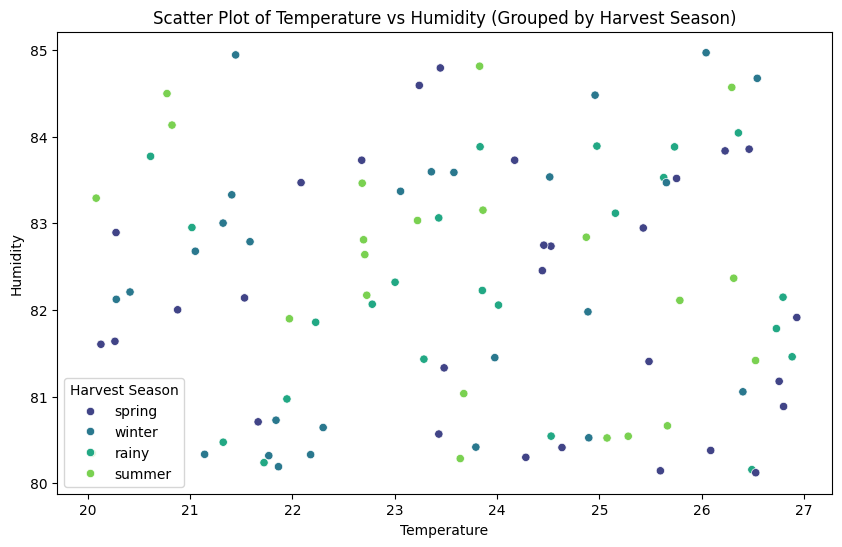

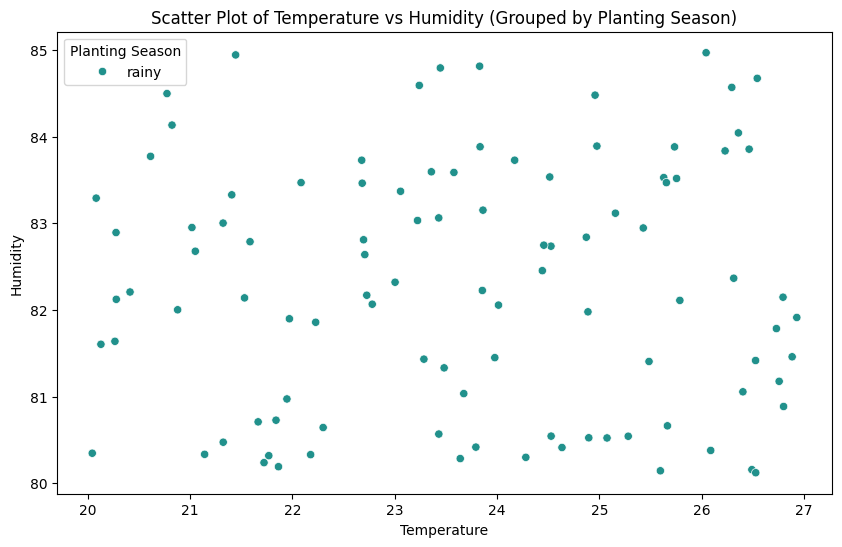

In [30]:
data_rice = data[data['label'] == 'rice']

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns 'temperature', 'humidity', 'harvest_season', and 'planting_season'

# Scatter plot with hue grouped by harvest season
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='harvest season', data=data_rice, palette='viridis')
plt.title('Scatter Plot of Temperature vs Humidity (Grouped by Harvest Season)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Harvest Season')
plt.show()

# Scatter plot with hue grouped by planting season
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='season', data=data_rice, palette='viridis')
plt.title('Scatter Plot of Temperature vs Humidity (Grouped by Planting Season)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Planting Season')
plt.show()


In [31]:
data

,temperature,humidity,ph,water availability,season,label,Country,harvest season
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria,spring
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria,winter
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria,rainy
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria,rainy
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria,spring
...,...,...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute,South Africa,winter
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute,South Africa,winter
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute,Nigeria,summer
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute,Nigeria,summer


In [32]:
import pandas as pd

# Assuming 'data' is your original DataFrame
# If not, replace 'data' with the actual DataFrame variable

# Define a custom lambda function to handle cases with multiple modes
mode_function = lambda x: x.mode().tolist() if len(x.mode()) > 1 else x.mode().iloc[0]

# Group by 'label' (crop) and apply the mode function to the 'season' column
mode_season = data.groupby('label')['season'].agg(mode_function)

# Display the result
print(mode_season)


label
blackgram               winter
chickpea                winter
cotton                  winter
jute                     rainy
kidneybeans             spring
lentil                   rainy
maize          [rainy, winter]
mothbeans               summer
mungbean                 rainy
muskmelon               summer
pigeonpeas               rainy
rice                     rainy
watermelon              summer
Name: season, dtype: object


In [33]:
# Crop data
planting_season = {
    'blackgram': 'winter',
    'chickpea': 'winter',
    'cotton': 'winter',
    'jute': 'rainy',
    'kidneybeans': 'spring',
    'lentil': 'rainy',
    'maize': 'winter',
    'mothbeans': 'summer',
    'mungbean': 'rainy',
    'muskmelon': 'summer',
    'pigeonpeas': 'rainy',
    'rice': 'rainy',
    'watermelon': 'summer'
}



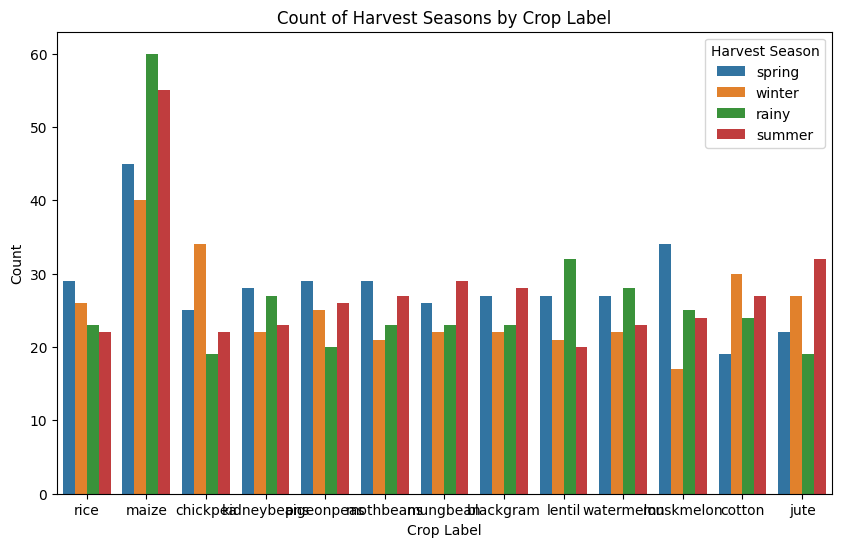

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='label', hue='harvest season', data=data)

# Add labels and title
plt.xlabel('Crop Label')
plt.ylabel('Count')
plt.title('Count of Harvest Seasons by Crop Label')

# Show the plot
plt.legend(title='Harvest Season')
plt.show()


C:\Users\FRANKFELIXAI\AppData\Local\Temp\ipykernel_14460\2933139006.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='water availability', data=data, ci=None)


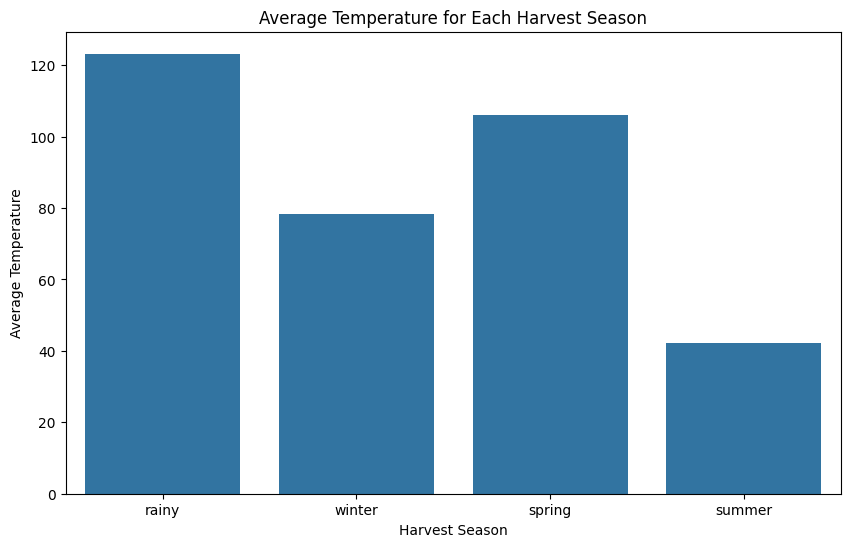

In [35]:
# Create a bar plot of average temperature for each harvest season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='water availability', data=data, ci=None)

# Add labels and title
plt.xlabel('Harvest Season')
plt.ylabel('Average Temperature')
plt.title('Average Temperature for Each Harvest Season')

# Show the plot
plt.show()

In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Create new variables to represent ratios
#data['humidity_to_temperature_ratio'] = data['humidity'] / data['temperature']
data['ph_to_water_availability_ratio'] = data['ph'] / data['water availability']


# Display the normalized and ratio variables
data


,temperature,humidity,ph,water availability,season,label,Country,harvest season,ph_to_water_availability_ratio
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria,spring,0.032045
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria,winter,0.031052
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria,rainy,0.029702
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria,rainy,0.028742
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria,spring,0.029037
...,...,...,...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute,South Africa,winter,0.037849
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute,South Africa,winter,0.044486
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute,Nigeria,summer,0.035962
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute,Nigeria,summer,0.035447


In [37]:
data.describe()

,temperature,humidity,ph,water availability,ph_to_water_availability_ratio
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,24.971621,64.611062,6.565246,91.784651,0.102296
std,4.081622,22.753785,0.835101,58.682258,0.062765
min,15.330426,14.258040,3.504752,20.211267,0.017961
25%,22.178239,56.824217,6.068795,51.546542,0.054525
50%,25.140245,68.288321,6.524478,72.379183,0.092119
75%,27.963227,82.710409,7.042343,107.428334,0.128430
max,36.977944,94.962187,9.935091,298.560117,0.323124


In [39]:
data[data["season"] ==  'summer']

,temperature,humidity,ph,water availability,season,label,Country,harvest season,ph_to_water_availability_ratio
500,27.910952,64.709306,3.692864,32.678919,summer,mothbeans,Nigeria,summer,0.113004
501,27.322206,51.278688,4.371746,36.503791,summer,mothbeans,Nigeria,winter,0.119761
502,28.660242,59.318912,8.399136,36.926297,summer,mothbeans,Nigeria,spring,0.227457
503,29.029553,61.093875,8.840656,72.980166,summer,mothbeans,South Africa,rainy,0.121138
504,27.780315,54.650300,8.153023,32.050253,summer,mothbeans,Nigeria,spring,0.254382
...,...,...,...,...,...,...,...,...,...
1195,29.527531,94.574594,6.700338,21.135457,summer,muskmelon,Kenya,spring,0.317019
1196,28.504164,93.468065,6.565313,24.200072,summer,muskmelon,Nigeria,summer,0.271293
1197,28.895786,94.789930,6.286515,23.036250,summer,muskmelon,Nigeria,summer,0.272897
1198,27.049275,91.382173,6.448062,23.657475,summer,muskmelon,South Africa,spring,0.272559


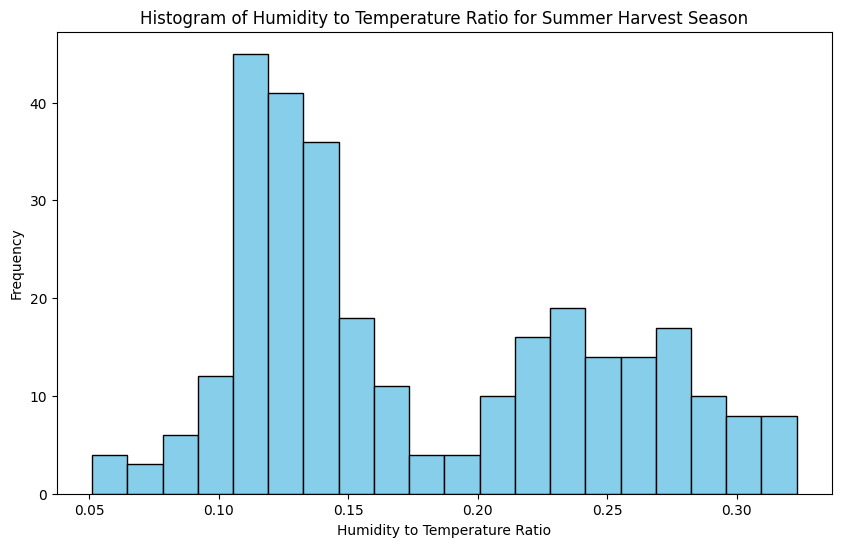

In [40]:
# Filter data for harvest season being summer
summer_data = data[data['season'] == 'summer']

# Create a histogram for humidity_to_temperature_ratio
plt.figure(figsize=(10, 6))
plt.hist(summer_data['ph_to_water_availability_ratio'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Humidity to Temperature Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity to Temperature Ratio for Summer Harvest Season')

# Show the plot
plt.show()

C:\Users\FRANKFELIXAI\AppData\Local\Temp\ipykernel_14460\831046997.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='ph_to_water_availability_ratio', data=data, ci=None)


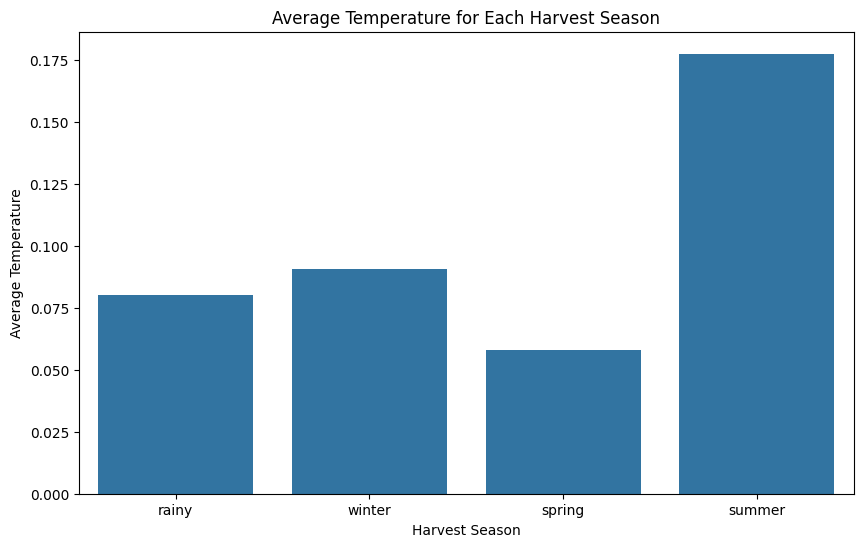

In [42]:
# Create a bar plot of average temperature for each harvest season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='ph_to_water_availability_ratio', data=data, ci=None)

# Add labels and title
plt.xlabel('Harvest Season')
plt.ylabel('Average Temperature')
plt.title('Average Temperature for Each Harvest Season')

# Show the plot
plt.show()

In [43]:
data = data.drop("harvest season", axis=1)
data = data.drop(columns=["temperature","humidity"],axis=1)

In [44]:
data = pd.get_dummies(data, columns=['Country', 'label'],dtype=int)


# Store the one-hot encoding information
one_hot_encoder_info = {
    'columns': data.columns,
    'original_columns': ['Country', 'label'],  # Original categorical columns
}
data

,ph,water availability,season,ph_to_water_availability_ratio,Country_Kenya,Country_Nigeria,Country_South Africa,Country_Sudan,label_blackgram,label_chickpea,...,label_jute,label_kidneybeans,label_lentil,label_maize,label_mothbeans,label_mungbean,label_muskmelon,label_pigeonpeas,label_rice,label_watermelon
0,6.502985,202.935536,rainy,0.032045,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,7.038096,226.655537,rainy,0.031052,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7.840207,263.964248,rainy,0.029702,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6.980401,242.864034,rainy,0.028742,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7.628473,262.717340,rainy,0.029037,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,6.718725,177.514731,rainy,0.037849,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1396,6.880205,154.660874,rainy,0.044486,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1397,6.861069,190.788639,rainy,0.035962,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1398,6.769346,190.968489,rainy,0.035447,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [60]:
import pickle

one_hot_encoder_info
with open('ML_Models/one_hot_encoder_info.pkl', 'wb') as one_hot_encoder_info_file:
    pickle.dump(one_hot_encoder_info, one_hot_encoder_info_file)

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pickle

# Label encode the 'harvest season' target variable
label_encoder = LabelEncoder()
data['season'] = label_encoder.fit_transform(data['season'])
# Save the trained model to a pickle file
with open('ML_Models/label_encoder.pkl', 'wb') as label_file:
    pickle.dump(label_encoder, label_file)
# Split the data into features (X) and target variable (y)
X = data.drop('season', axis=1)
y = data['season']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

# Train the XGBoost model
model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=True)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode label encoding for y_test and y_pred
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print the classification report
print(classification_report(y_test_decoded, y_pred_decoded))


[0]	validation_0-mlogloss:0.91530
[1]	validation_0-mlogloss:0.66592
[2]	validation_0-mlogloss:0.50729
[3]	validation_0-mlogloss:0.40185
[4]	validation_0-mlogloss:0.32691
[5]	validation_0-mlogloss:0.27580
[6]	validation_0-mlogloss:0.23802


[7]	validation_0-mlogloss:0.21113
[8]	validation_0-mlogloss:0.19413
[9]	validation_0-mlogloss:0.18061
[10]	validation_0-mlogloss:0.17213
[11]	validation_0-mlogloss:0.16586
[12]	validation_0-mlogloss:0.16106
[13]	validation_0-mlogloss:0.15857


c:\Users\FRANKFELIXAI\Desktop\MavunoX\.venv\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\FRANKFELIXAI\Desktop\MavunoX\.venv\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-mlogloss:0.15530
[15]	validation_0-mlogloss:0.15438
[16]	validation_0-mlogloss:0.15302
[17]	validation_0-mlogloss:0.15064
[18]	validation_0-mlogloss:0.15228
[19]	validation_0-mlogloss:0.15302
[20]	validation_0-mlogloss:0.15397
[21]	validation_0-mlogloss:0.15580
[22]	validation_0-mlogloss:0.16069
[23]	validation_0-mlogloss:0.16320
[24]	validation_0-mlogloss:0.16934
[25]	validation_0-mlogloss:0.17433
[26]	validation_0-mlogloss:0.18238
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       117
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        62
           3       0.84      0.78      0.81        81

    accuracy                           0.89       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.89      0.89      0.89       280



In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier





# Split the data into features (X) and target variable (y)
X = data.drop('season', axis=1)
y = data['season']

# Create an XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), seed=42)

# Train the XGBoost model on the full dataset
model.fit(X, y)

# Save the trained model to a pickle file
with open('ML_Models\main_model_xgboost.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("XGBoost Model trained and saved.")


<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\FRANKFELIXAI\AppData\Local\Temp\ipykernel_14460\3222184459.py:21: SyntaxWarning: invalid escape sequence '\m'
  with open('ML_Models\main_model_xgboost.pkl', 'wb') as model_file:


XGBoost Model trained and saved.


In [49]:
list(label_encoder.inverse_transform([0]))

['rainy']

In [50]:
new_entry = {
    'ph': 5.8,
    'water availability': 230.0,
    'label': 'rice',
    'Country': 'Nigeria'
}

# Convert the single-entry dictionary to a DataFrame
new_data = pd.DataFrame.from_dict({0: new_entry}, orient='index')
# Apply the same one-hot encoding to 'Country' and 'label'
new_data_encoded = pd.get_dummies(new_data, columns=['Country', 'label'], dtype=int)
#new_data_encoded['humidity_to_temperature_ratio'] = new_data_encoded['humidity'] / new_data_encoded['temperature']
new_data_encoded['ph_to_water_availability_ratio'] = new_data_encoded['ph'] / new_data_encoded['water availability']

# Ensure the columns match the ones used during training
new_data_encoded = new_data_encoded.reindex(columns=one_hot_encoder_info['columns'], fill_value=0)
new_data_encoded

,ph,water availability,season,ph_to_water_availability_ratio,Country_Kenya,Country_Nigeria,Country_South Africa,Country_Sudan,label_blackgram,label_chickpea,...,label_jute,label_kidneybeans,label_lentil,label_maize,label_mothbeans,label_mungbean,label_muskmelon,label_pigeonpeas,label_rice,label_watermelon
0,5.8,230.0,0,0.025217,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
new_data_encoded = new_data_encoded.drop('season',axis = 1)
# Make predictions with the XGBoost model
predictions = model.predict(new_data_encoded)
# Inverse transform the predicted labels to get harvest season in words
predictions_words = label_encoder.inverse_transform(predictions)
# Print the predicted harvest season
print("Predicted Harvest Season:", predictions_words[0])

Predicted Harvest Season: rainy


In [ ]:
predictions

In [52]:
import math
# Optimal pH
optimal_pH = 7.2

# Predicted pH (replace this with your actual predicted pH value)
predicted_pH = 7.2

# Calculate percentage deviation
percentage_deviation = (math.sqrt(((predicted_pH - optimal_pH) * (predicted_pH - optimal_pH))/ (optimal_pH*optimal_pH))) * 100

# Print the result
print(f"Percentage Deviation: {percentage_deviation:.2f}%")


Percentage Deviation: 0.00%


In [53]:
# Optimal pH
optimal_pH = 7.2

# Predicted pH (replace this with your actual predicted pH value)
predicted_pH = 0  # Replace 0 with your predicted pH value

# Lower and upper limits for pH values
lower_limit_pH = 5.0
upper_limit_pH = 10.0

# Ensure the predicted pH is within a reasonable range (lower and upper limits)
predicted_pH = max(lower_limit_pH, min(predicted_pH, upper_limit_pH))

# Calculate percentage deviation
percentage_deviation = ((predicted_pH - optimal_pH) / optimal_pH) * 100

# Bound the percentage deviation between -100% and 100%
bounded_percentage_deviation = max(min(percentage_deviation, 100), -100)

# Calculate absolute deviation from optimal pH
absolute_deviation = abs(predicted_pH - optimal_pH) / optimal_pH * 100

# Print the results
print(f"Bounded Percentage Deviation: {bounded_percentage_deviation:.2f}%")
print(f"Absolute Deviation from Optimal pH: {absolute_deviation:.2f}%")


Bounded Percentage Deviation: -30.56%
Absolute Deviation from Optimal pH: 30.56%


In [54]:
import math

def calculate_similarity(actual_number, input_number, k):
    absolute_difference = abs(actual_number - input_number)
    similarity_percentage = 100 * math.exp(-k * absolute_difference**2)
    return similarity_percentage
actual_number = 7
input_number = 5
k = 0.75

result = calculate_similarity(actual_number, input_number, k)
print(f"The similarity percentage is: {result:.2f}%")


The similarity percentage is: 4.98%


In [ ]:
data

In [55]:
csv_file_path = 'Data\crop_info.csv'

# Save to CSV
new_df.set_index('label', inplace=True)
new_df.to_csv(csv_file_path)


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\FRANKFELIXAI\AppData\Local\Temp\ipykernel_14460\3028629012.py:1: SyntaxWarning: invalid escape sequence '\c'
  csv_file_path = 'Data\crop_info.csv'


In [56]:
new_df

,temperature,humidity,water availability,ph
label,,,,
blackgram,"{'min': 27.152432047999998, 'max': 33.09532432...","{'min': 61.607230490999996, 'max': 68.35449825...","{'min': 62.993649003, 'max': 72.6160534295, 'o...","{'min': 6.6568300816, 'max': 7.53940737615, 'o..."
chickpea,"{'min': 17.477631682, 'max': 20.27124315050000...","{'min': 14.8193207355, 'max': 18.9230566860000...","{'min': 70.81886495, 'max': 89.6111375725, 'op...","{'min': 6.407769550499999, 'max': 8.1712847137..."
cotton,"{'min': 22.709439126, 'max': 25.3265672615, 'o...","{'min': 76.245014327, 'max': 83.6330800825, 'o...","{'min': 66.4507179315, 'max': 91.9694626535, '...","{'min': 6.1858448929000005, 'max': 7.637939133..."
jute,"{'min': 23.5424241035, 'max': 26.3935686925, '...","{'min': 73.467221263, 'max': 86.8493020675, 'o...","{'min': 154.836804955, 'max': 192.27084764, 'o...","{'min': 6.1853212619999995, 'max': 7.265441530..."
kidneybeans,"{'min': 17.12554529, 'max': 23.217351125999997...","{'min': 18.927807457, 'max': 24.33394803849999...","{'min': 72.805035837, 'max': 137.351065635, 'o...","{'min': 5.58200486985, 'max': 5.935097944, 'op..."
lentil,"{'min': 20.7112031235, 'max': 28.079029967, 'o...","{'min': 61.57261354, 'max': 68.5381460915, 'op...","{'min': 38.193138948999994, 'max': 51.99230858...","{'min': 6.2779073979, 'max': 7.60671783535, 'o..."
maize,"{'min': 18.870903989, 'max': 25.3459979215, 'o...","{'min': 59.245742102499996, 'max': 71.65201071...","{'min': 65.83237718150001, 'max': 104.17304672...","{'min': 5.7502038647, 'max': 6.67668998275, 'o..."
mothbeans,"{'min': 25.4956392275, 'max': 30.904391545, 'o...","{'min': 44.7515350515, 'max': 61.2678578939999...","{'min': 35.024337555, 'max': 68.1166552245, 'o...","{'min': 4.5240911647, 'max': 8.86957240095, 'o..."
mungbean,"{'min': 27.5979922385, 'max': 29.598025546, 'o...","{'min': 81.97399679499999, 'max': 88.674317031...","{'min': 40.1587070585, 'max': 56.549994111, 'o...","{'min': 6.40088285645, 'max': 7.07024288150000..."


In [57]:

# Convert the DataFrame to a dictionary
new_df_dict = new_df.to_dict(orient = 'index')
new_df_dict

{'blackgram': {'temperature': {'min': 27.152432047999998,
   'max': 33.0953243205,
   'opt': 29.9733396789},
  'humidity': {'min': 61.607230490999996,
   'max': 68.3544982525,
   'opt': 65.1184255887},
  'water availability': {'min': 62.993649003,
   'max': 72.6160534295,
   'opt': 67.88415118319999},
  'ph': {'min': 6.6568300816, 'max': 7.53940737615, 'opt': 7.133951629480002}},
 'chickpea': {'temperature': {'min': 17.477631682,
   'max': 20.271243150500002,
   'opt': 18.8728467519},
  'humidity': {'min': 14.8193207355,
   'max': 18.923056686000002,
   'opt': 16.8604394237},
  'water availability': {'min': 70.81886495,
   'max': 89.6111375725,
   'opt': 80.0589772605},
  'ph': {'min': 6.407769550499999, 'max': 8.1712847137, 'opt': 7.33695662374}},
 'cotton': {'temperature': {'min': 22.709439126,
   'max': 25.3265672615,
   'opt': 23.988957895200006},
  'humidity': {'min': 76.245014327,
   'max': 83.6330800825,
   'opt': 79.8434742538},
  'water availability': {'min': 66.4507179315,
  

In [58]:
new_df_dict

{'blackgram': {'temperature': {'min': 27.152432047999998,
   'max': 33.0953243205,
   'opt': 29.9733396789},
  'humidity': {'min': 61.607230490999996,
   'max': 68.3544982525,
   'opt': 65.1184255887},
  'water availability': {'min': 62.993649003,
   'max': 72.6160534295,
   'opt': 67.88415118319999},
  'ph': {'min': 6.6568300816, 'max': 7.53940737615, 'opt': 7.133951629480002}},
 'chickpea': {'temperature': {'min': 17.477631682,
   'max': 20.271243150500002,
   'opt': 18.8728467519},
  'humidity': {'min': 14.8193207355,
   'max': 18.923056686000002,
   'opt': 16.8604394237},
  'water availability': {'min': 70.81886495,
   'max': 89.6111375725,
   'opt': 80.0589772605},
  'ph': {'min': 6.407769550499999, 'max': 8.1712847137, 'opt': 7.33695662374}},
 'cotton': {'temperature': {'min': 22.709439126,
   'max': 25.3265672615,
   'opt': 23.988957895200006},
  'humidity': {'min': 76.245014327,
   'max': 83.6330800825,
   'opt': 79.8434742538},
  'water availability': {'min': 66.4507179315,
  

In [62]:
import pickle

# Pickle the dictionary
with open('ML_Models\crop_info.pkl', 'wb') as file:
    pickle.dump(new_df_dict, file)

# Display a message indicating successful pickling
print("Dictionary pickled and save")

Dictionary pickled and save


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\FRANKFELIXAI\AppData\Local\Temp\ipykernel_14460\3806476339.py:4: SyntaxWarning: invalid escape sequence '\c'
  with open('ML_Models\crop_info.pkl', 'wb') as file:
